<a href="https://colab.research.google.com/github/LeconteEsteban/Supervive/blob/main/analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gspread pandas

In [3]:
import pandas as pd
import requests
from io import StringIO

# URL corrected for CSV export
url_champions = "https://docs.google.com/spreadsheets/d/1XL3mx0ywhhQRXvIIvnik2yDcszB-agBJsqB3UHdvhyQ/export?format=csv&gid=0"
url_equipments = "https://docs.google.com/spreadsheets/d/1XL3mx0ywhhQRXvIIvnik2yDcszB-agBJsqB3UHdvhyQ/export?format=csv&gid=1440748823"

# Download champion data
response = requests.get(url_champions)
champ_data = pd.read_csv(StringIO(response.content.decode('utf-8')))
print(champ_data.head())
# Download equipment data
response = requests.get(url_equipments)
equipement_data = pd.read_csv(StringIO(response.content.decode('utf-8')))
print(equipement_data.head())

       Nom  BaseMaxHealth MaxHealthPerLevel  MoveSpeed  AttackPowerRating  \
0   Hudson           1180              70,8        430                  2   
1  Kingpin           1155              69,3        465                  3   
2      Jin            980              58,8        465                  5   
3     Oath           1080              70,8        485                  6   
4   Elluna           1030              31,3        455                  6   

  Toughness  Difficulty                        autoattack                 RMB  \
0         5           1                           30 + 8%                   0   
1         5           2                   518,4 + 4,9%)*7                   0   
2         3           4  81 + 58,5% + 40 + 70% + 62 + 45%          50 + 87,5%   
3         6           2                            73+35%                   0   
4       4,5           1                          33 + 32%  50 +14% + 200 +20%   

  RMB cooldown  ...  Shift mana                  Q

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Nom                16 non-null     object
 1   BaseMaxHealth      16 non-null     int64 
 2   MaxHealthPerLevel  16 non-null     object
 3   MoveSpeed          16 non-null     int64 
 4   AttackPowerRating  16 non-null     int64 
 5   Toughness          16 non-null     object
 6   Difficulty         16 non-null     int64 
 7   autoattack         16 non-null     object
 8   RMB                16 non-null     object
 9   RMB cooldown       16 non-null     object
 10  RMB mana           16 non-null     int64 
 11  Shift              16 non-null     object
 12  Shift cooldown     16 non-null     object
 13  Shift mana         16 non-null     object
 14  Q                  16 non-null     object
 15  Q cooldown         16 non-null     object
 16  Q mana             16 non-null     int64 
 17 

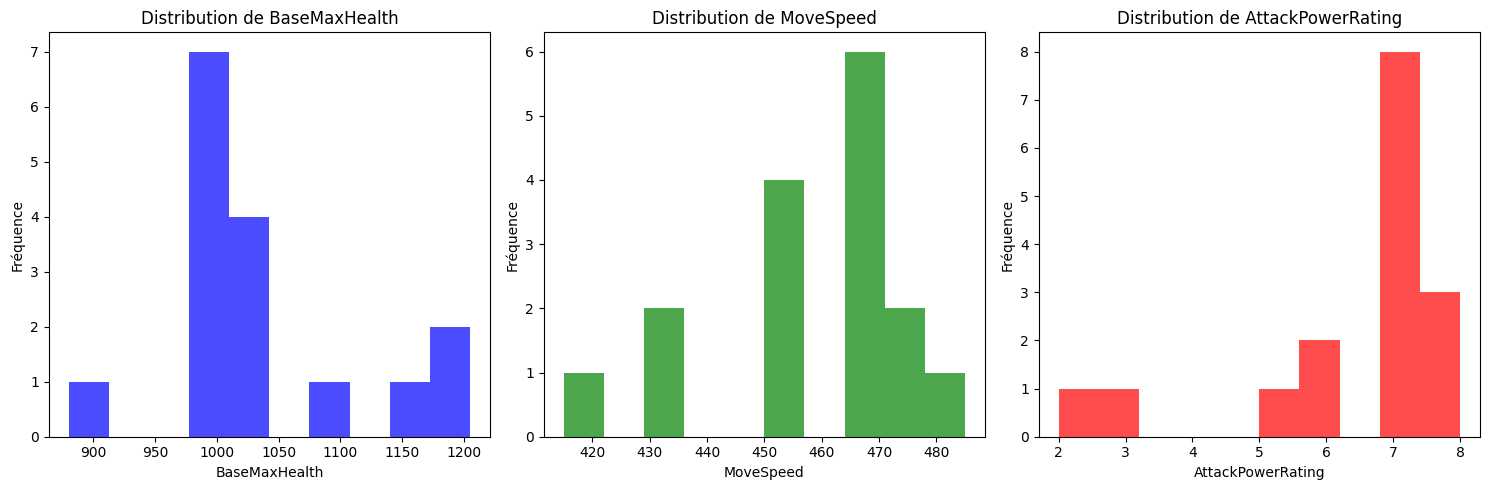

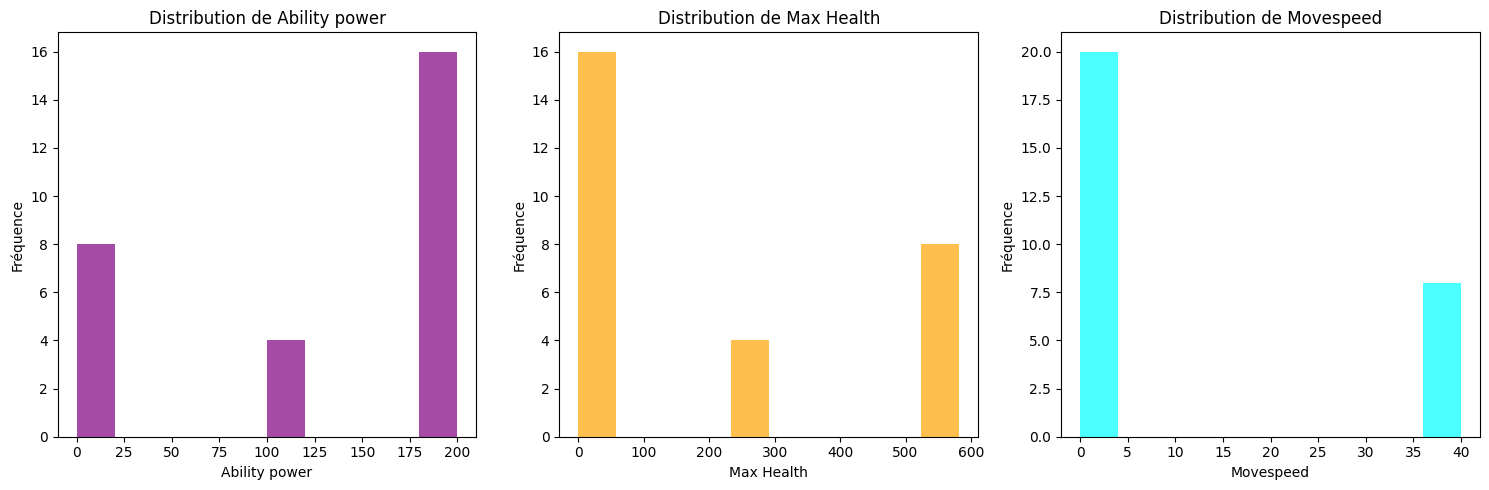

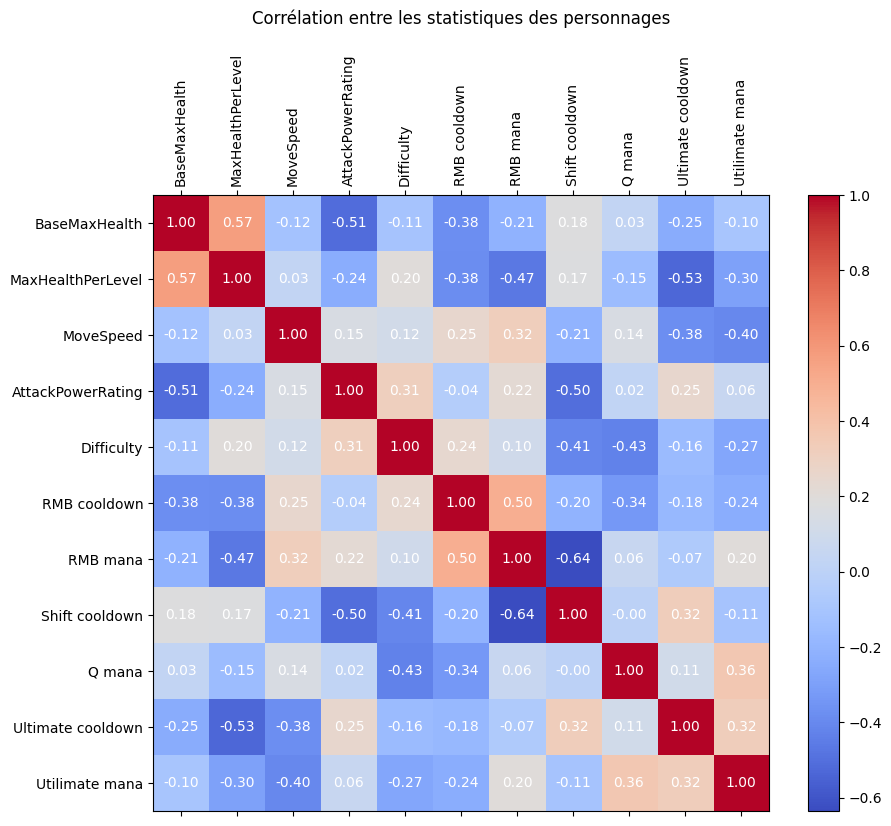

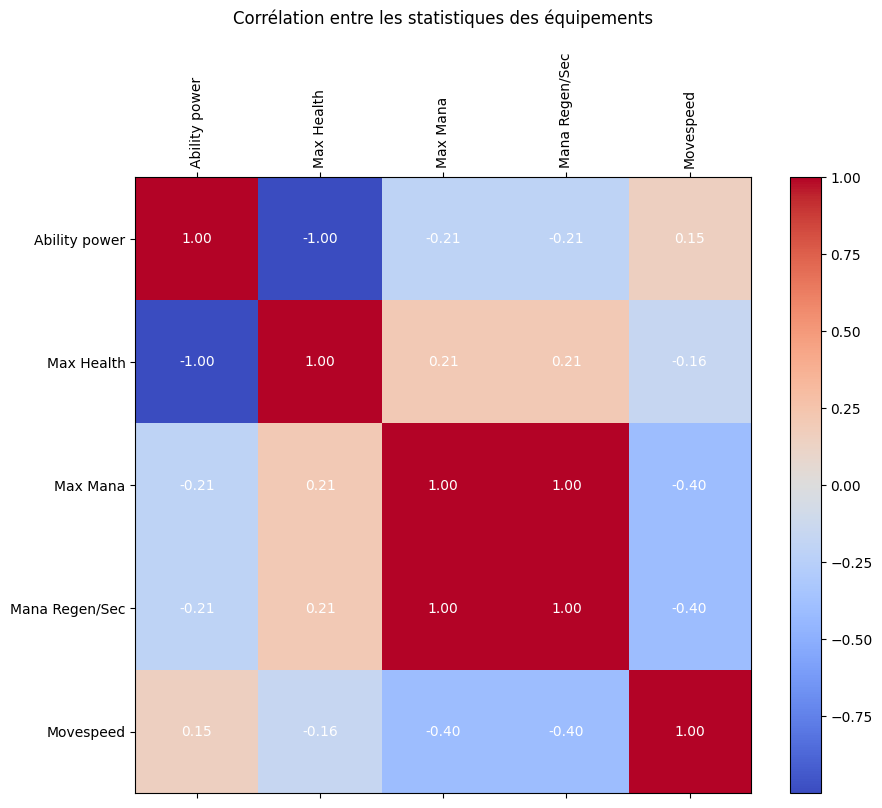

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Vérification et aperçu des données
champ_data.head(), champ_data.info(), equipement_data.head(), equipement_data.info()

# Conversion des colonnes numériques mal formatées pour le fichier champ
champ_data['MaxHealthPerLevel'] = champ_data['MaxHealthPerLevel'].str.replace(',', '.').astype(float)
champ_data['RMB cooldown'] = champ_data['RMB cooldown'].str.replace(',', '.').astype(float)
champ_data['Shift cooldown'] = champ_data['Shift cooldown'].str.replace(',', '.').astype(float)

# Visualisations avec Matplotlib uniquement

# Distribution des statistiques principales des personnages
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(champ_data['BaseMaxHealth'], bins=10, color='blue', alpha=0.7)
axes[0].set_title('Distribution de BaseMaxHealth')
axes[0].set_xlabel('BaseMaxHealth')
axes[0].set_ylabel('Fréquence')

axes[1].hist(champ_data['MoveSpeed'], bins=10, color='green', alpha=0.7)
axes[1].set_title('Distribution de MoveSpeed')
axes[1].set_xlabel('MoveSpeed')
axes[1].set_ylabel('Fréquence')

axes[2].hist(champ_data['AttackPowerRating'], bins=10, color='red', alpha=0.7)
axes[2].set_title('Distribution de AttackPowerRating')
axes[2].set_xlabel('AttackPowerRating')
axes[2].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

# Distribution des statistiques principales des équipements
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(equipement_data['Ability power'], bins=10, color='purple', alpha=0.7)
axes[0].set_title('Distribution de Ability power')
axes[0].set_xlabel('Ability power')
axes[0].set_ylabel('Fréquence')

axes[1].hist(equipement_data['Max Health'], bins=10, color='orange', alpha=0.7)
axes[1].set_title('Distribution de Max Health')
axes[1].set_xlabel('Max Health')
axes[1].set_ylabel('Fréquence')

axes[2].hist(equipement_data['Movespeed'], bins=10, color='cyan', alpha=0.7)
axes[2].set_title('Distribution de Movespeed')
axes[2].set_xlabel('Movespeed')
axes[2].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

# Corrélations dans les données des personnages
fig, ax = plt.subplots(figsize=(10, 8))
corr = champ_data.select_dtypes(include='number').corr()
cax = ax.matshow(corr, cmap='coolwarm')
fig.colorbar(cax)
ax.set_title('Corrélation entre les statistiques des personnages', pad=20)

# Ajouter les noms des colonnes et les valeurs de la corrélation
for (i, j), val in np.ndenumerate(corr):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white', fontsize=10)

ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns)

plt.show()

# Corrélations dans les données des équipements
fig, ax = plt.subplots(figsize=(10, 8))
corr_eq = equipement_data.select_dtypes(include='number').corr()
cax = ax.matshow(corr_eq, cmap='coolwarm')
fig.colorbar(cax)
ax.set_title('Corrélation entre les statistiques des équipements', pad=20)

# Ajouter les noms des colonnes et les valeurs de la corrélation
for (i, j), val in np.ndenumerate(corr_eq):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white', fontsize=10)

ax.set_xticks(range(len(corr_eq.columns)))
ax.set_xticklabels(corr_eq.columns, rotation=90)
ax.set_yticks(range(len(corr_eq.columns)))
ax.set_yticklabels(corr_eq.columns)

plt.show()

In [5]:
# Extraction des données pertinentes
healths = equipement_data["Max Health"].to_numpy()
speeds = equipement_data["Movespeed"].to_numpy()
mana = equipement_data["Max Mana"].to_numpy()
powers = equipement_data["Ability power"].to_numpy()
ability_haste = pd.to_numeric(equipement_data["Ability Haste"], errors='coerce').fillna(0).to_numpy()  # Ability Haste
omnivamp = pd.to_numeric(equipement_data["Omnivamp"], errors='coerce').fillna(0).to_numpy()  # Omnivamp
equip_names = equipement_data["Nom"].to_numpy()
passifs = equipement_data["Passif"].fillna("").to_numpy()  # Gestion des passifs vides (null)
champ_names = champ_data["Nom"].to_numpy()

# Transformation des passifs en scores numériques
passive_scores = np.zeros(len(passifs))
for idx, passif in enumerate(passifs):
    if passif.strip():
        passif_lower = passif.lower()
        passive_scores[idx] += 200 if "damage" in passif_lower else 0
        passive_scores[idx] += 200 if "speed" in passif_lower else 0
        passive_scores[idx] += 200 if "health" in passif_lower else 0
        passive_scores[idx] += 200 if "mana" in passif_lower else 0
        passive_scores[idx] += 190 if "omnivamp" in passif_lower else 0

# Moyennes statistiques globales par classe et par type
class_means = champ_data.select_dtypes(include="number").groupby(champ_data["Class"]).mean()
type_means = champ_data.select_dtypes(include="number").groupby(champ_data["Type"]).mean()
class_type_means = champ_data.select_dtypes(include="number").groupby([champ_data["Class"], champ_data["Type"]]).mean()

# Calcul des moyennes des statistiques des champions
average_health = champ_data["BaseMaxHealth"].mean()
average_speed = champ_data["MoveSpeed"].mean()
average_power = champ_data["AttackPowerRating"].mean()

mana_columns = [col for col in champ_data.columns if "mana" in col.lower()]
champ_mana_totals = champ_data[mana_columns].apply(pd.to_numeric, errors="coerce").sum(axis=1)
average_mana = champ_mana_totals.mean()

# Calcul des pondérations dynamiques pour un champion
def calculer_pondérations(champion):
    """
    Calcule les pondérations dynamiques en fonction des caractéristiques du champion,
    en les ajustant selon les moyennes des statistiques globales.
    """
    pondérations = {
        "santé": 0.01,
        "vitesse": 0.01,
        "puissance": 0.01,
        "mana": 0.01,
    }

    # Adapter les pondérations en fonction de la classe du champion
    if champion["Class"] == "Fighter":
        pondérations["santé"] += 0.2
        pondérations["puissance"] += 0.5
    elif champion["Class"] == "Initiator":
        pondérations["vitesse"] += 0.2
        pondérations["puissance"] += 0.4
        pondérations["mana"] += 0.2
    elif champion["Class"] == "Protector":
        pondérations["santé"] += 0.2
        pondérations["mana"] += 1
    elif champion["Class"] == "Frontliner":
        pondérations["santé"] += 1

    if champion["Type"] == "Fighter":
        pondérations["santé"] += 0.2
        pondérations["puissance"] += 0.5
    elif champion["Type"] == "Mage":
        pondérations["vitesse"] -= 0.2
        pondérations["santé"] -= 0.4
        pondérations["puissance"] += 0.4
        pondérations["mana"] += 1.4
    elif champion["Type"] == "Assasin":
        pondérations["puissance"] += 0.7
        pondérations["vitesse"] += 0.8
        pondérations["santé"] -= 0.4
    elif champion["Type"] == "Protector":
        pondérations["santé"] += 1
    elif champion["Type"] == "Shooter":
        pondérations["puissance"] += 0.6
        pondérations["mana"] += 1.3
        pondérations["mana"] += 0.9
        pondérations["santé"] -= 0.5
    elif champion["Type"] == "Initiator":
        pondérations["santé"] -= 0.5
        pondérations["puissance"] += 0.7
        pondérations["mana"] += 1.3

    # Adapter les pondérations en fonction du type (Melee ou Ranged)
    if champion["Ranged /melee"] == "Melee":
        pondérations["vitesse"] -= 0.7
    elif champion["Ranged /melee"] == "Ranged":
        pondérations["vitesse"] += 0.1
        pondérations["mana"] += 0.5

    # Adapter les pondérations en fonction des statistiques du champion par rapport aux moyennes
    if champion["BaseMaxHealth"] > average_health:
        pondérations["santé"] += 0.4  # Si la santé est supérieure à la moyenne, augmenter la pondération
    elif champion["BaseMaxHealth"] < average_health:
        pondérations["santé"] -= 0.1  # Si la santé est inférieure à la moyenne, diminuer la pondération

    if champion["AttackPowerRating"] > average_power:
        pondérations["puissance"] += 0.3  # Si la puissance est supérieure à la moyenne, augmenter la pondération
    elif champion["AttackPowerRating"] < average_power:
        pondérations["puissance"] -= 0.1  # Si la puissance est inférieure à la moyenne, diminuer la pondération

    if champion["MoveSpeed"] > average_speed:
        pondérations["vitesse"] += 0.4  # Si la vitesse est supérieure à la moyenne, augmenter la pondération
    elif champion["MoveSpeed"] < average_speed:
        pondérations["vitesse"] -= 0.2  # Si la vitesse est inférieure à la moyenne, diminuer la pondération

    if champ_mana_totals[champion.name] > average_mana:
        pondérations["mana"] += 0.2  # Si le mana est supérieur à la moyenne, augmenter la pondération
    elif champ_mana_totals[champion.name] < average_mana:
        pondérations["mana"] -= 0.1  # Si le mana est inférieur à la moyenne, diminuer la pondération

    return pondérations

# Fonction pour calculer le score de compatibilité entre un champion et un équipement
def calculer_score_champion(champion, equipement, passive_score):
    pondérations = calculer_pondérations(champion)

    score_base = champion["BaseMaxHealth"] + champion["MoveSpeed"] + champion["AttackPowerRating"] + champ_mana_totals[champion.name]

    synergie_total = 0
    if equipement["Max Health"]:
        synergie_total += equipement["Max Health"] * pondérations["santé"]
    if equipement["Ability power"]:
        synergie_total += equipement["Ability power"] * pondérations["puissance"]
    if equipement["Max Mana"]:
        synergie_total += equipement["Max Mana"] * pondérations["mana"]
    if equipement["Movespeed"]:
        synergie_total += equipement["Movespeed"] * pondérations["vitesse"]

    score_total = score_base + synergie_total + passive_score
    return score_total

# Automatiser le calcul pour tous les champions et tous les équipements
def calculer_scores(champions, equipements, passive_scores):
    resultats = []
    for _, champion in champions.iterrows():
        for _, equipement in equipements.iterrows():
            passive_score = passive_scores[equipement.name]  # Récupérer le score passif
            score = calculer_score_champion(champion, equipement, passive_score)
            resultats.append({
                "champion": champion["Nom"],
                "equipement": equipement["Nom"],
                "score_compatibilite": score
            })
    return resultats

# Afficher ou sauvegarder les résultats
def afficher_resultats(resultats):
    for resultat in resultats:
        print(f"Champion: {resultat['champion']} | Equipement: {resultat['equipement']} | Score de compatibilité: {resultat['score_compatibilite']}")

# Fonction pour récupérer les 2 meilleurs équipements pour chaque champion
def meilleurs_equipements(resultats):
    meilleurs_equipements_par_champion = {}

    # Grouper les résultats par champion
    for resultat in resultats:
        champion = resultat['champion']
        equipement = resultat['equipement']
        score_compatibilite = resultat['score_compatibilite']

        if champion not in meilleurs_equipements_par_champion:
            meilleurs_equipements_par_champion[champion] = []

        # Ajouter l'équipement et son score pour chaque champion
        meilleurs_equipements_par_champion[champion].append({
            'equipement': equipement,
            'score_compatibilite': score_compatibilite
        })

    # Trier les équipements pour chaque champion par score de compatibilité
    for champion in meilleurs_equipements_par_champion:
        meilleurs_equipements_par_champion[champion] = sorted(
            meilleurs_equipements_par_champion[champion],
            key=lambda x: x['score_compatibilite'],
            reverse=True
        )[:2]  # Garder les 2 meilleurs équipements

    return meilleurs_equipements_par_champion

# Afficher les meilleurs équipements pour chaque champion
def afficher_meilleurs_equipements(meilleurs_equipements_par_champion):
    for champion, equipements in meilleurs_equipements_par_champion.items():
        print(f"\nMeilleurs équipements pour {champion}:")
        for equipement in equipements:
            print(f"Champion: {champion} | Equipement: {equipement['equipement']} | Score de compatibilité: {equipement['score_compatibilite']}")

# Appel des fonctions et afficher les résultats
resultats = calculer_scores(champ_data, equipement_data, passive_scores)
afficher_resultats(resultats)

# Appel des fonctions
meilleurs_equipements_par_champion = meilleurs_equipements(resultats)
afficher_meilleurs_equipements(meilleurs_equipements_par_champion)

# Dictionnaire des équipements idéaux
ideal_equipments = {
    "Brall": ["Swiftblade", "Rampage"],
    "Ghost": ["Swiftblade", "Mindblade"],
    "Jin": ["Grace", "Swiftblade"],
    "Joule": ["Grace", "Mindblade"],
    "Myth": ["Mindblade", "Interweaver"],
    "Shiv": ["Overdrive", "Grace"],
    "Shrike": ["Grace", "Mindblade"],
    "Bishop": ["Grace", "Swiftblade"],
    "Kingpin": ["Mindblade", "Vive Infusor"],
    "Felix": ["SoulBound", "Swiftblade"],
    "Oath": ["Scholar", "Glacial Comet"],
    "Elluna": ["Mindblade", "Rampage"],
    "Zeph": ["Grace", "Mindblade"],
    "Celeste": ["Mindblade", "Rampage"],
    "Hudson": ["Scholar", "Glacial Comet"],
    "Void": ["Power User", "Grace"]
}

# Fonction pour calculer l'accuracy
def calculer_accuracy(meilleurs_equipements_par_champion, reference):
    total_champions = len(reference)
    correct_predictions = 0

    for champion, meilleurs_equipements in reference.items():
        if champion in meilleurs_equipements_par_champion:
            predicted_equipements = [eq['equipement'] for eq in meilleurs_equipements_par_champion[champion]]
            # Vérifier si les prédictions contiennent les équipements attendus
            if set(meilleurs_equipements).issubset(set(predicted_equipements)):
                correct_predictions += 1

    # Calcul de l'accuracy
    accuracy = correct_predictions / total_champions if total_champions > 0 else 0
    return accuracy

# Exemple d'utilisation
resultats = calculer_scores(champ_data, equipement_data, passive_scores)
meilleurs_equipements_par_champion = meilleurs_equipements(resultats)
accuracy = calculer_accuracy(meilleurs_equipements_par_champion, ideal_equipments)

print(f"Accuracy de la prédiction : {accuracy * 100:.2f}%")

Champion: Hudson | Equipement: Ambrush | Score de compatibilité: 2070.17
Champion: Hudson | Equipement: Amplifier | Score de compatibilité: 1750.0
Champion: Hudson | Equipement: Big Game Hunter | Score de compatibilité: 1946.4
Champion: Hudson | Equipement: Bladed Helmet | Score de compatibilité: 1876.2
Champion: Hudson | Equipement: Bubble Blade | Score de compatibilité: 1797.15
Champion: Hudson | Equipement: Glacial Comet | Score de compatibilité: 2270.17
Champion: Hudson | Equipement: Grace | Score de compatibilité: 2146.4
Champion: Hudson | Equipement: Greed | Score de compatibilité: 1876.2
Champion: Hudson | Equipement: Guardian Respite | Score de compatibilité: 2023.02
Champion: Hudson | Equipement: Helm of Gigantism | Score de compatibilité: 2076.2
Champion: Hudson | Equipement: Interweaver | Score de compatibilité: 1950.0
Champion: Hudson | Equipement: Last Stand | Score de compatibilité: 1940.0
Champion: Hudson | Equipement: Mana Blade | Score de compatibilité: 1797.15
Champio